In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
 

In [23]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

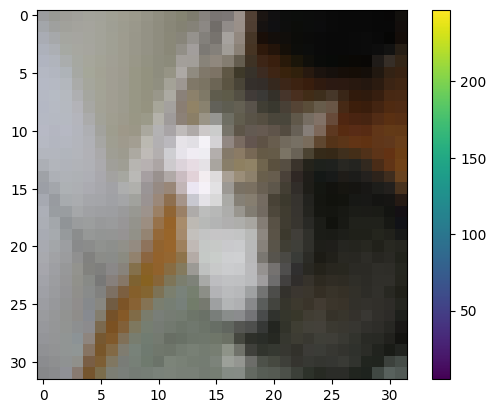

In [25]:
plt.figure()
plt.imshow(x_train[101])
plt.colorbar()
plt.grid(False)

In [26]:
x_train = x_train/ 255
x_test = x_test/ 255

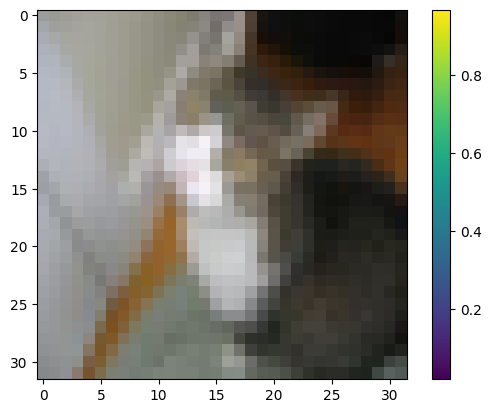

In [27]:
plt.figure()
plt.imshow(x_train[101])
plt.colorbar()
plt.grid(False)

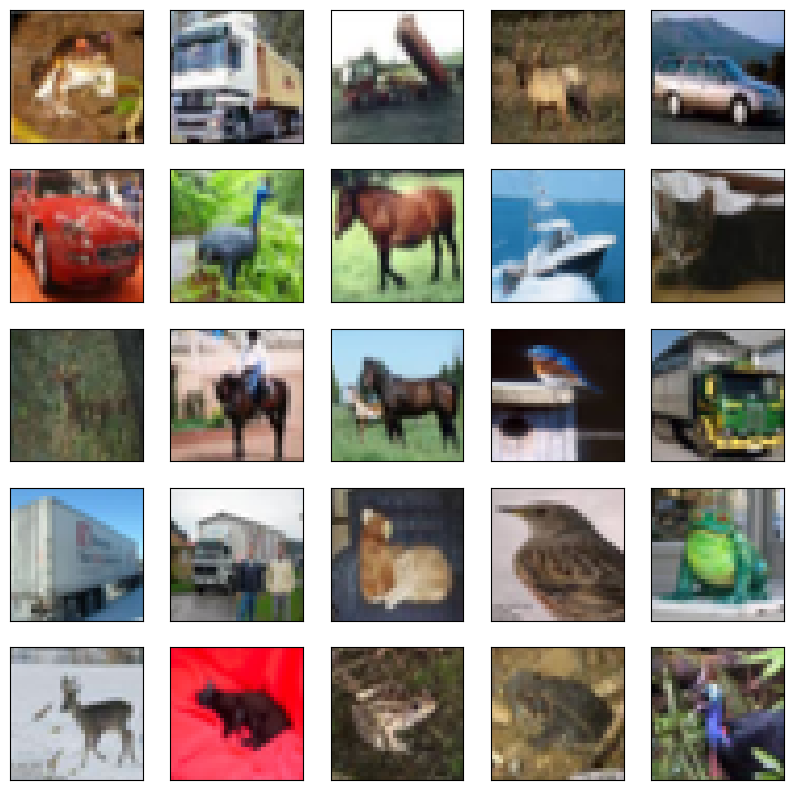

In [28]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)


In [87]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Conv2D(64, (3, 3), activation='relu'),

                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [88]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten_8 (Flatten)         (None, 10816)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               1384576   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                      

In [90]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.8374 - accuracy: 0.3431
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4709 - accuracy: 0.4770
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3003 - accuracy: 0.5394
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1873 - accuracy: 0.5827
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.0943 - accuracy: 0.6165
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0149 - accuracy: 0.6458
Epoch 7/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9418 - accuracy: 0.6735
Epoch 8/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8760 - accuracy: 0.6967
Epoch 9/10
1563/1563 [==============================] - 84s 53ms/step - loss: 0.8151 - accuracy: 0.7164
Epoch 10/10
1563/1563 [==============================] - 85s 54m

In [91]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7006 - accuracy: 0.7565
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.6453 - accuracy: 0.7788
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5901 - accuracy: 0.7970
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5351 - accuracy: 0.8160
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.4784 - accuracy: 0.8374
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4233 - accuracy: 0.8579
Epoch 7/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.3677 - accuracy: 0.8767
Epoch 8/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.3146 - accuracy: 0.8950
Epoch 9/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.2628 - accuracy: 0.9165
Epoch 10/10
1563/1563 [==============================] - 85s 54m

In [92]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 1.1583 - accuracy: 0.6828
Test loss: 1.158261775970459
Test accuracy: 0.6827999949455261


In [93]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 25s 16ms/step


In [94]:
predictions[0]

array([3.0482511e-07, 2.1338587e-07, 2.5695830e-04, 8.7493926e-04,
       7.1796443e-05, 1.4089220e-04, 9.9865240e-01, 2.4872991e-06,
       2.3844479e-10, 2.0223478e-09], dtype=float32)

In [106]:
np.argmax(predictions[0])

6

In [107]:
y_train[0]

array([6])

Text(0.5, 0, 'frog')

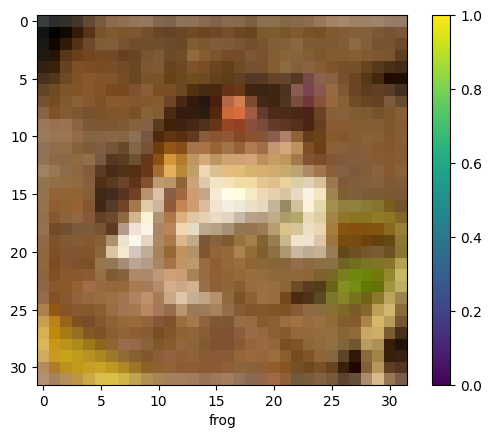

In [119]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0][0]])